<a href="https://colab.research.google.com/github/GarimaAgrawal13/Digit-Recognition/blob/main/knn_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/knndigitrecognition/mnist_train.csv')
print(df.shape)
print(df.columns)
df.head(n=5)

(60000, 785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [ ]:
x=data[:,1:]
y=data[:,0]
print(x.shape,y.shape)

(60000, 784) (60000,)


In [ ]:
split=int(0.8*x.shape[0])
print(split)

x_train=x[:split,:]
y_train=y[:split]

x_test=x[split:,:]
y_test=y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


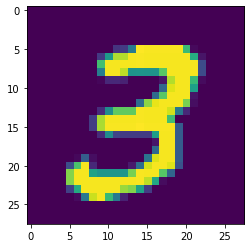

3


In [ ]:
#visualise some samples

def drawimg(sample):
  img=sample.reshape((28,28))
  plt.imshow(img)
  plt.show()

drawimg(x_train[7])
print(y_train[7])


**KNN**

In [ ]:
def dist(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

def knn(x,y,querypoint,k=5):

  vals=[]
  m=x.shape[0]

  for i in range(m):
    d=dist(querypoint,x[i])
    vals.append((d,y[i]))

  vals=sorted(vals)
  #nearest first k points
  vals=vals[:k]

  vals=np.array(vals)

  #print(vals)

  new_vals=np.unique(vals[:,1],return_counts=True)
  #print(new_vals)

  index=new_vals[1].argmax()
  pred=new_vals[0][index]

  return pred

In [ ]:
pred=knn(x_train,y_train,x_test[1])
print(int(pred))

7


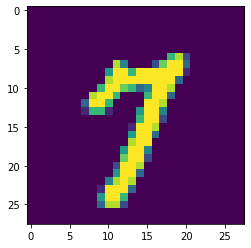

7


In [ ]:
drawimg(x_test[1])
print(y_test[1])